# Heart Disease Prediction Using Machine Learning

This notebook provides a step-by-step guide to building and evaluating various machine learning models to predict the presence of heart disease using the Cleveland dataset.

## 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

%matplotlib inline

## 2. Load Dataset

In [2]:
df = pd.read_csv('Heart_disease_cleveland_new.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0


## 3. Exploratory Data Analysis (EDA)
Let's examine the data, check for missing values, and understand feature distributions.

In [3]:
#checking data
print(f"Dataset Shape: {df.shape}")
df.info()

# Quickly check if any data is missing
df.isnull().sum()

Dataset Shape: (303, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [4]:
# Taking a look at some summary stats to understand our data better
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,2.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,0.600660,0.663366,1.831683,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,0.956705,0.499120
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,1.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,3.000000,1.000000


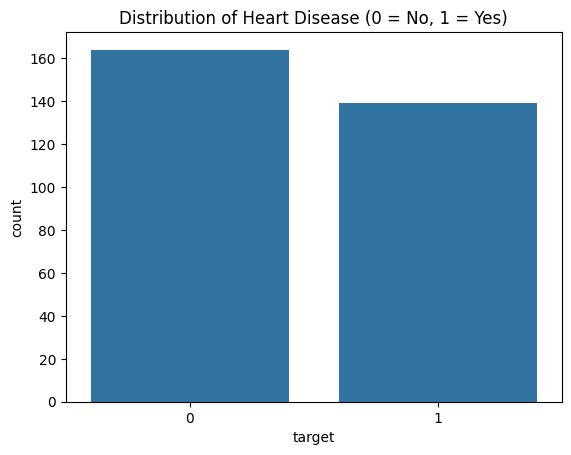

In [5]:
# Let's see how many people have heart disease vs those who don't
sns.countplot(x='target', data=df)
plt.title('Distribution of Heart Disease (0 = No, 1 = Yes)')
plt.show()

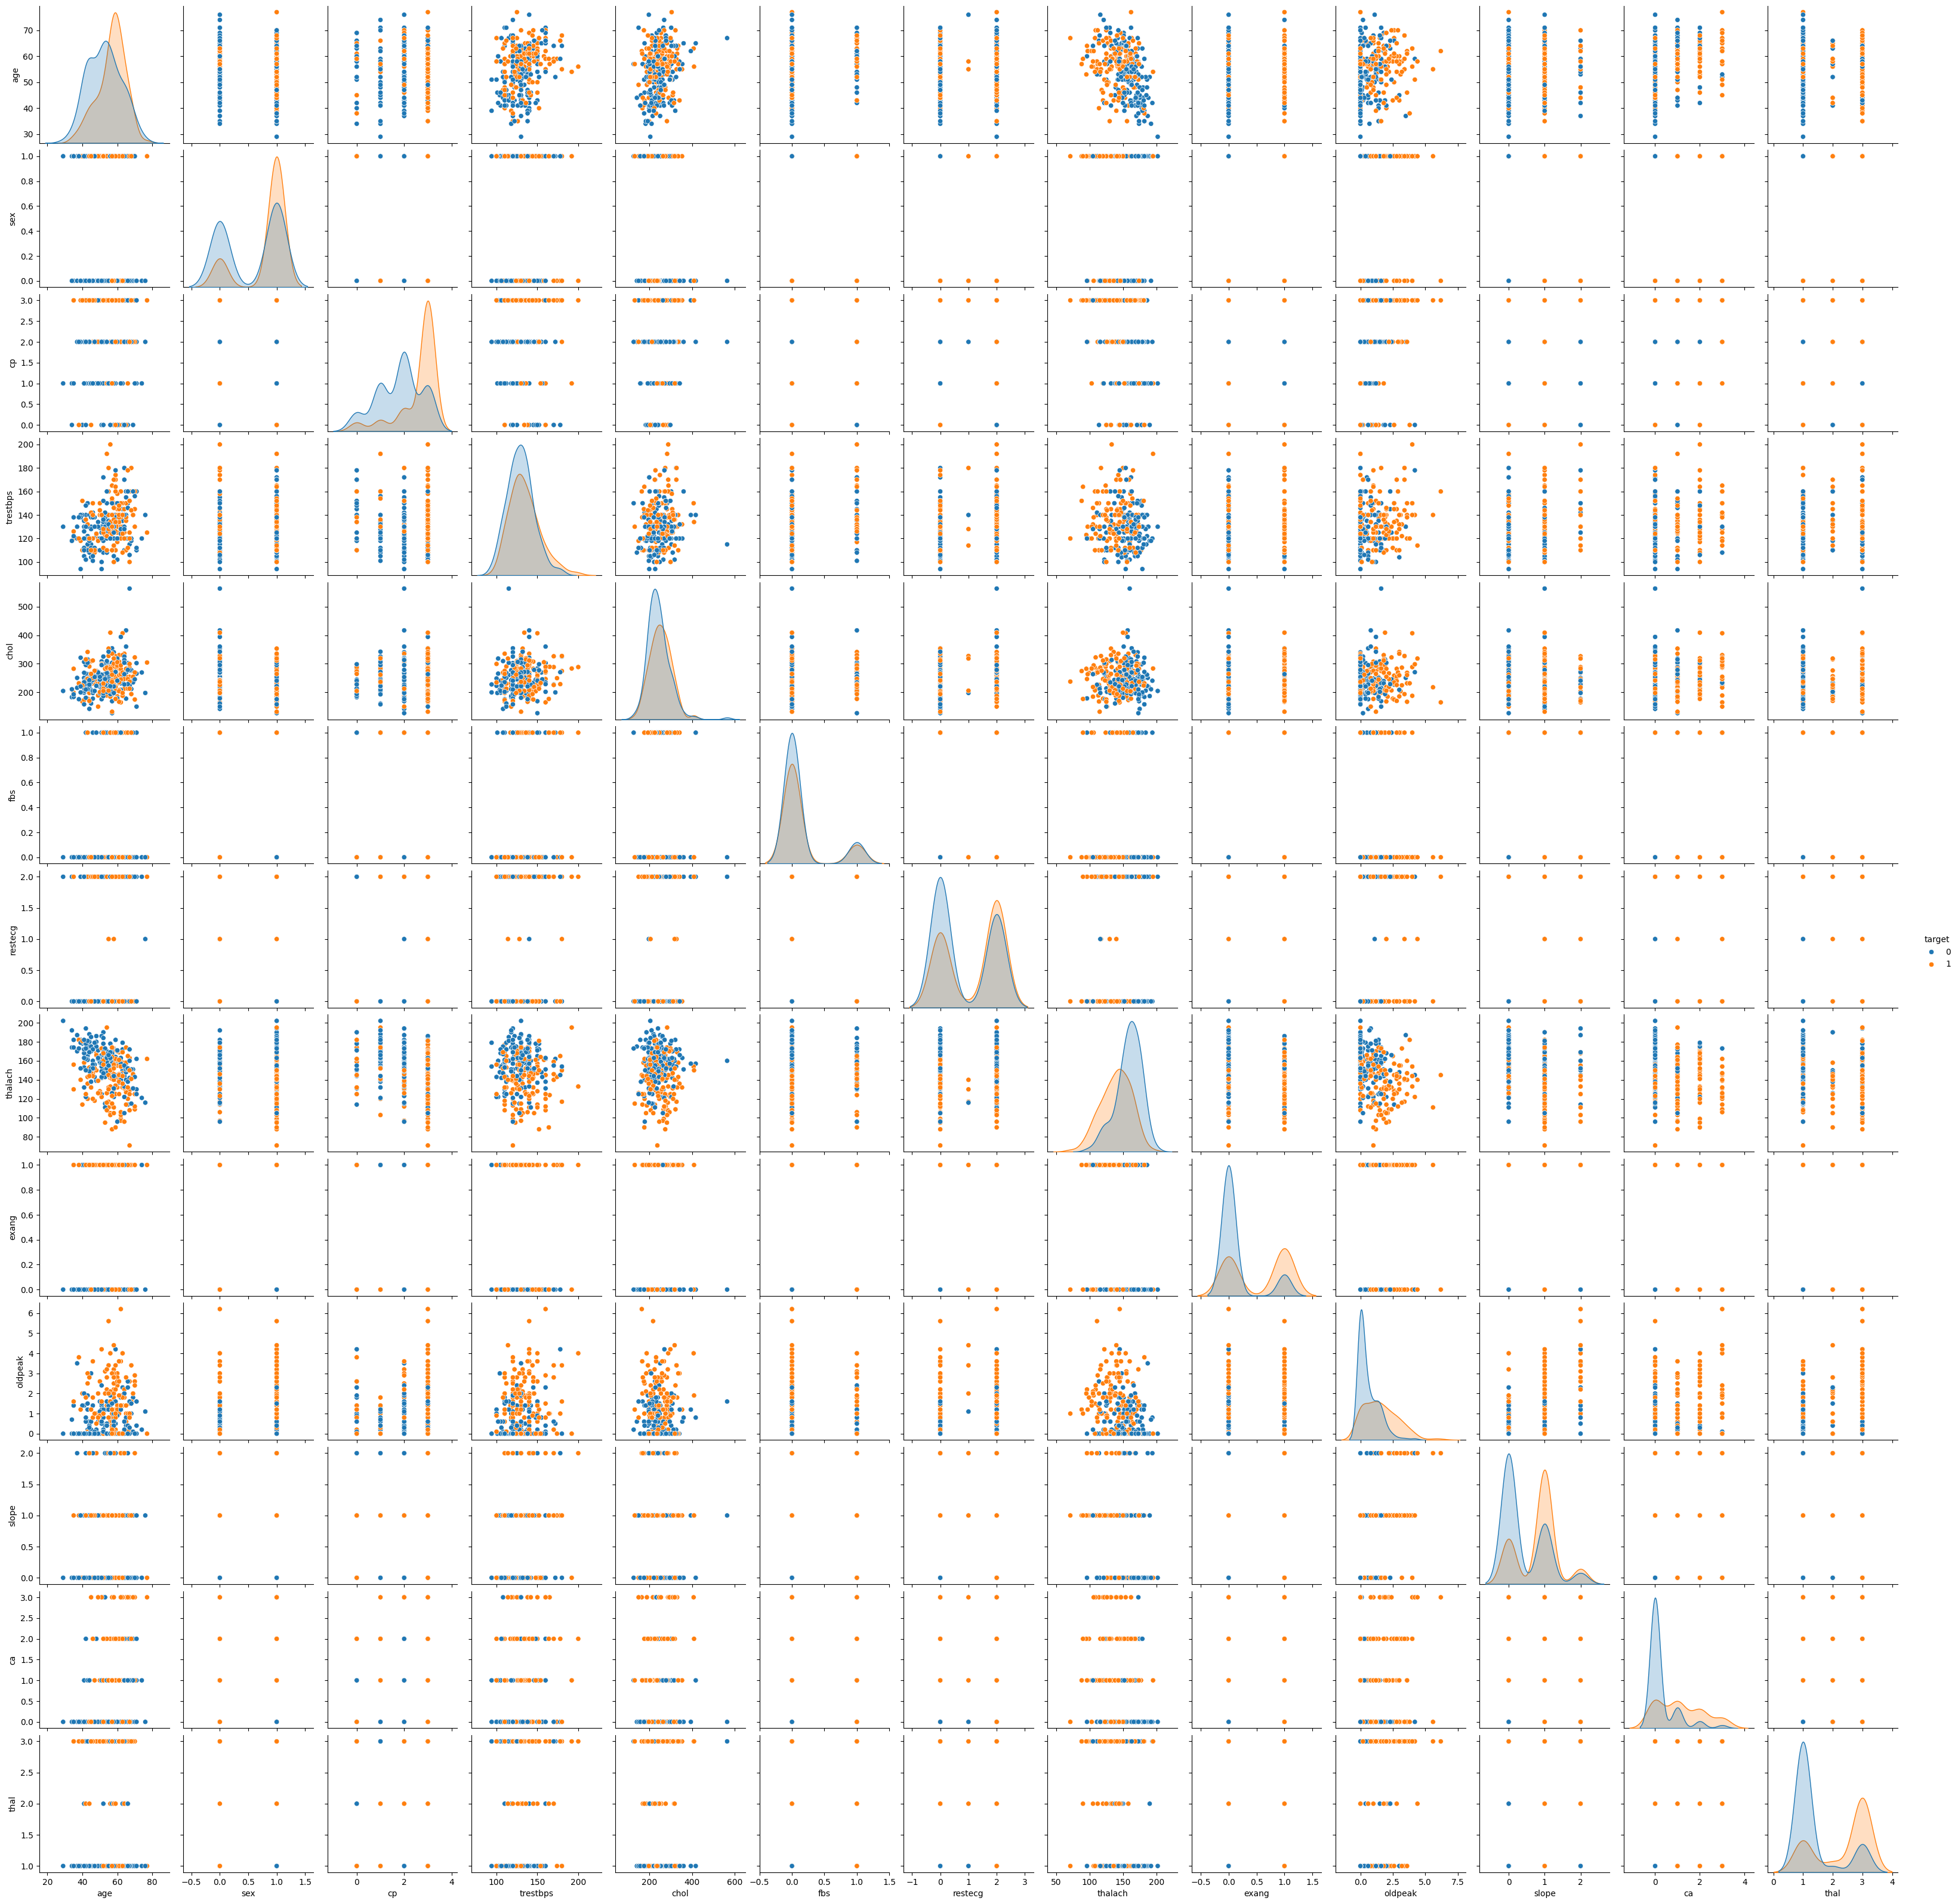

In [6]:
# This might take a moment — it's a good way to visualize relationships between features
sns.pairplot(df, hue='target')
plt.show()

## 4. Data Preprocessing
### 4.1 Handling Missing Values
If there are missing values, decide on imputation or removal.

In [7]:
# If there are any missing values, we could either drop them or fill them with something like the median
# df = df.dropna()
# Or impute with median:
# df.fillna(df.median(), inplace=True)
df = df.copy()  # Update if preprocessing is needed

### 4.2 Feature and Target Separation

In [8]:
# Let's separate the features from the target column ('target' tells us if the person has heart disease)
X = df.drop('target', axis=1)
y = df['target']

### 4.3 Train-Test Split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

Training set size: (242, 13)
Test set size: (61, 13)


### 4.4 Feature Scaling

In [10]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 5. Model Training and Evaluation
We'll train multiple models and evaluate their performance.

### 5.1 Logistic Regression

In [11]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train_scaled, y_train)
lr_pred = lr.predict(X_test_scaled)
lr_acc = accuracy_score(y_test, lr_pred)
print(f"Logistic Regression Accuracy: {lr_acc:.4f}")

Logistic Regression Accuracy: 0.8689


### 5.2 K-Nearest Neighbors (KNN)

In [12]:
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
knn_pred = knn.predict(X_test_scaled)
knn_acc = accuracy_score(y_test, knn_pred)
print(f"KNN Accuracy: {knn_acc:.4f}")

KNN Accuracy: 0.9016


### 5.3 Support Vector Machine (SVM)

In [13]:
svm = SVC(random_state=42)
svm.fit(X_train_scaled, y_train)
svm_pred = svm.predict(X_test_scaled)
svm_acc = accuracy_score(y_test, svm_pred)
print(f"SVM Accuracy: {svm_acc:.4f}")

SVM Accuracy: 0.8525


### 5.4 Decision Tree

In [14]:
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)  # Note: Decision Trees don't actually need scaled data, so we're passing raw inputs
dtc_pred = dtc.predict(X_test)
dtc_acc = accuracy_score(y_test, dtc_pred)
print(f"Decision Tree Accuracy: {dtc_acc:.4f}")

Decision Tree Accuracy: 0.7377


### 5.5 Random Forest

In [15]:
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
rfc_acc = accuracy_score(y_test, rfc_pred)
print(f"Random Forest Accuracy: {rfc_acc:.4f}")

Random Forest Accuracy: 0.8852


### 5.6 XGBoost

In [16]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
xgb_acc = accuracy_score(y_test, xgb_pred)
print(f"XGBoost Accuracy: {xgb_acc:.4f}")

XGBoost Accuracy: 0.8525


d:\Code\extra\Heart\env\lib\site-packages\xgboost\training.py:183: UserWarning: [12:49:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


### 5.7 Gradient Boosting

In [17]:
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train, y_train)
gbc_pred = gbc.predict(X_test)
gbc_acc = accuracy_score(y_test, gbc_pred)
print(f"Gradient Boosting Accuracy: {gbc_acc:.4f}")

Gradient Boosting Accuracy: 0.8525


## 6. Detailed Evaluation Metrics
Let's look at the confusion matrix and classification report for the best-performing model.

In [18]:
# Let's evaluate our best model (we're using XGBoost here as an example)
best_model = xgb
best_pred = xgb_pred
print("Confusion Matrix:")
print(confusion_matrix(y_test, best_pred))
print("\nClassification Report:")
print(classification_report(y_test, best_pred))

Confusion Matrix:
[[26  7]
 [ 2 26]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.79      0.85        33
           1       0.79      0.93      0.85        28

    accuracy                           0.85        61
   macro avg       0.86      0.86      0.85        61
weighted avg       0.86      0.85      0.85        61



## 7. Model Comparison

In [19]:
models = pd.DataFrame({
    'Model': [
        'Logistic Regression', 'KNN', 'SVM', 'Decision Tree',
        'Random Forest', 'XGBoost', 'Gradient Boosting'
    ],
    'Accuracy': [
        lr_acc, knn_acc, svm_acc, dtc_acc, rfc_acc, xgb_acc, gbc_acc
    ]
})
models = models.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)
models

,Model,Accuracy
0,KNN,0.901639
1,Random Forest,0.885246
2,Logistic Regression,0.868852
3,SVM,0.852459
4,XGBoost,0.852459
5,Gradient Boosting,0.852459
6,Decision Tree,0.737705


In [20]:
import joblib

# Assume 'knn' is your fitted KNeighborsClassifier
# (e.g., knn.fit(X_train_scaled, y_train) was already called)

# 1. Save the trained KNN to a file
joblib.dump(knn, 'knn_model.pkl')
print("KNN model saved as 'knn_model.pkl'")


KNN model saved as 'knn_model.pkl'


In [21]:
# Let's save our best-performing model so we don't have to retrain it every time.
import joblib

# 'best_model' should be the variable holding your chosen classifier (e.g., XGBoost)
joblib.dump(best_model, 'heart_disease_model.pkl')
print("Model saved successfully as 'heart_disease_model.pkl'")

Model saved successfully as 'heart_disease_model.pkl'


In [22]:


import joblib
from sklearn.metrics import accuracy_score

joblib.dump(scaler, "scaler.pkl")
print("StandardScaler saved as 'scaler.pkl'")
model = joblib.load('knn_model.pkl')
print("Model saved : Knn")

preds = model.predict(X_test_scaled)

# 3. Optionally, evaluate
print("Loaded model. Test Accuracy:", accuracy_score(y_test, preds))


StandardScaler saved as 'scaler.pkl'
Model saved : Knn
Loaded model. Test Accuracy: 0.9016393442622951


## 8. Conclusion
- Summarize which model performed best based on accuracy.
- Discuss potential next steps: hyperparameter tuning, cross-validation, feature engineering, etc.